**<font size='6' color='red'>ch4. RNN(Recurrent Neural Network) 순환신경망</font>**
# 1. 문맥을 이용하여 모델만들기 - 자연어 전처리

In [1]:
text = """
경마장에 있는 말이 뛰고 있다
그의 말이 곧 법이다
가는 말이 고와야 오는 말이 곱다
"""

In [2]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])
print(encoded)
print(t.word_index)

[[2, 3, 1, 4, 5, 6, 1, 7, 8, 9, 1, 10, 11, 1, 12]]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '곧': 7, '법이다': 8, '가는': 9, '고와야': 10, '오는': 11, '곱다': 12}


In [3]:
# 문자열리스트를 인덱스 시퀀스로 반환
print(t.texts_to_sequences(['경마장에 말이 있다', '말이 곱다']))

[[2, 1, 5], [1, 12]]


In [4]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 곧 법이다
가는 말이 고와야 오는 말이 곱다"""

In [5]:
print(t.word_index)
for word, value in t.word_index.items():
    if value == 2:
        print(word)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '곧': 7, '법이다': 8, '가는': 9, '고와야': 10, '오는': 11, '곱다': 12}
경마장에


In [6]:
vocab_size = len(t.word_index)

In [7]:
# text를 학습시키기 위해 ['경마장에 있는', '경마장에 있는 말이', '경마장에 있는 말이 뛰고']
sequences = []
for line in text.split('\n'):
    print('원래문장 :', line)
    encoded = t.texts_to_sequences([line])[0]
    print('encoded된 문장 :',encoded)
    for i in range(0, len(encoded)-1):
        for j in range(i+2, vocab_size+1):
            sequences.append(encoded[i:j])
# print(sequences)
print('sequences와 해석을 출력')
for sequence in sequences:
    print('[', end='')
    for word_seq in sequence:
        for word, value in t.word_index.items():
            if value == word_seq:
                print('{}:{}'.format(word_seq, word), end='')
                break
    print(']')

원래문장 : 경마장에 있는 말이 뛰고 있다
encoded된 문장 : [2, 3, 1, 4, 5]
원래문장 : 그의 말이 곧 법이다
encoded된 문장 : [6, 1, 7, 8]
원래문장 : 가는 말이 고와야 오는 말이 곱다
encoded된 문장 : [9, 1, 10, 11, 1, 12]
sequences와 해석을 출력
[2:경마장에3:있는]
[2:경마장에3:있는1:말이]
[2:경마장에3:있는1:말이4:뛰고]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[2:경마장에3:있는1:말이4:뛰고5:있다]
[3:있는1:말이]
[3:있는1:말이4:뛰고]
[3:있는1:말이4:뛰고5:있다]
[3:있는1:말이4:뛰고5:있다]
[3:있는1:말이4:뛰고5:있다]
[3:있는1:말이4:뛰고5:있다]
[3:있는1:말이4:뛰고5:있다]
[3:있는1:말이4:뛰고5:있다]
[3:있는1:말이4:뛰고5:있다]
[3:있는1:말이4:뛰고5:있다]
[1:말이4:뛰고]
[1:말이4:뛰고5:있다]
[1:말이4:뛰고5:있다]
[1:말이4:뛰고5:있다]
[1:말이4:뛰고5:있다]
[1:말이4:뛰고5:있다]
[1:말이4:뛰고5:있다]
[1:말이4:뛰고5:있다]
[1:말이4:뛰고5:있다]
[4:뛰고5:있다]
[4:뛰고5:있다]
[4:뛰고5:있다]
[4:뛰고5:있다]
[4:뛰고5:있다]
[4:뛰고5:있다]
[4:뛰고5:있다]
[4:뛰고5:있다]
[6:그의1:말이]
[6:그의1:말이7:곧]
[6:그의1:말이7:곧8:법이다]
[6:그의1:말이7:곧8:법이다]
[6:그의1:말이7:곧8:법이다]
[6:그의1:말이7:곧8:법이다]
[6:그의1:말이7:곧8:법이다]
[6:그의1:말이7:곧8:법이다]
[6:그의1:말이7:곧8:법이다]
[6:그의1:말이7:곧8:

In [8]:
sequences[:5]

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [2, 3, 1, 4, 5]]

In [9]:
# sequence별 len
my_len = max([len(sequence) for sequence in sequences])
my_len

6

In [10]:
# sequences를 훈련 가능하도록 6개열로 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences=sequences,
                                 maxlen = my_len, # 최대 열수
                                 padding='pre', # 최대 열수보다 적은경우 0을 채울 위치
                                 truncating='pre' # 최대 열수보다 많은 경우
                                )
type(padded_sequences), padded_sequences.shape, padded_sequences

(numpy.ndarray,
 (113, 6),
 array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  3,  1],
        [ 0,  0,  0,  3,  1,  4],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  1,  4],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0, 

In [11]:
# 독립변수(x)와 타겟변수(종속변수 y)로 분리
X = padded_sequences[:,:-1]
y = padded_sequences[:,-1]
y

array([ 3,  1,  4,  5,  5,  5,  5,  5,  5,  5,  5,  1,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  1,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        1, 10, 11,  1, 12, 12, 12, 12, 12, 12, 12, 10, 11,  1, 12, 12, 12,
       12, 12, 12, 12, 11,  1, 12, 12, 12, 12, 12, 12, 12,  1, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [12]:
# 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, len(t.word_index)+1) # 원핫인코딩 카테고리 수
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
X.shape, Y.shape

((113, 5), (113, 13))

# 2. 모델 생성(RNN)
-  순서가 의미 있는 데이터를 학습할 경우 ex. 자연어처리, 주식, 연주, 날씨 등

In [14]:
from tensorflow.keras.models import Sequential # 순차적 레이어 모델 생성
from tensorflow.keras.layers import Embedding, SimpleRNN # 긴 희소행렬 변환
from tensorflow.keras.layers import Dense

model = Sequential()
# 희소행렬(12) -> 10열 행렬 (31개행 = 독립변수 행수)
model.add(Embedding(input_dim=vocab_size+1, # 12개 입력
                    output_dim=vocab_size-1, # 10개를 출력하기 위한 embedding
                    input_length=X.shape[1], # 독립변수 데이터 수
                   ))
model.add(SimpleRNN(units=32))
model.add(Dense(units=Y.shape[1], activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 11)             143       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1408      
                                                                 
 dense (Dense)               (None, 13)                429       
                                                                 
Total params: 1,980
Trainable params: 1,980
Non-trainable params: 0
_________________________________________________________________
None


# 3. 학습과정 설정 및 학습하기

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x=X, y=Y, verbose=2, epochs=300)

Epoch 1/300
4/4 - 1s - loss: 2.5365 - accuracy: 0.1416 - 1s/epoch - 301ms/step
Epoch 2/300
4/4 - 0s - loss: 2.4772 - accuracy: 0.5310 - 41ms/epoch - 10ms/step
Epoch 3/300
4/4 - 0s - loss: 2.4151 - accuracy: 0.6106 - 39ms/epoch - 10ms/step
Epoch 4/300
4/4 - 0s - loss: 2.3403 - accuracy: 0.6106 - 39ms/epoch - 10ms/step
Epoch 5/300
4/4 - 0s - loss: 2.2507 - accuracy: 0.5575 - 37ms/epoch - 9ms/step
Epoch 6/300
4/4 - 0s - loss: 2.1426 - accuracy: 0.4513 - 36ms/epoch - 9ms/step
Epoch 7/300
4/4 - 0s - loss: 2.0121 - accuracy: 0.4513 - 39ms/epoch - 10ms/step
Epoch 8/300
4/4 - 0s - loss: 1.8768 - accuracy: 0.4425 - 36ms/epoch - 9ms/step
Epoch 9/300
4/4 - 0s - loss: 1.7571 - accuracy: 0.3805 - 36ms/epoch - 9ms/step
Epoch 10/300
4/4 - 0s - loss: 1.6669 - accuracy: 0.3805 - 32ms/epoch - 8ms/step
Epoch 11/300
4/4 - 0s - loss: 1.6109 - accuracy: 0.3894 - 40ms/epoch - 10ms/step
Epoch 12/300
4/4 - 0s - loss: 1.5546 - accuracy: 0.4513 - 35ms/epoch - 9ms/step
Epoch 13/300
4/4 - 0s - loss: 1.5089 - accur

Epoch 104/300
4/4 - 0s - loss: 0.2470 - accuracy: 0.9381 - 32ms/epoch - 8ms/step
Epoch 105/300
4/4 - 0s - loss: 0.2443 - accuracy: 0.9469 - 40ms/epoch - 10ms/step
Epoch 106/300
4/4 - 0s - loss: 0.2417 - accuracy: 0.9469 - 38ms/epoch - 9ms/step
Epoch 107/300
4/4 - 0s - loss: 0.2392 - accuracy: 0.9558 - 36ms/epoch - 9ms/step
Epoch 108/300
4/4 - 0s - loss: 0.2364 - accuracy: 0.9558 - 40ms/epoch - 10ms/step
Epoch 109/300
4/4 - 0s - loss: 0.2337 - accuracy: 0.9558 - 33ms/epoch - 8ms/step
Epoch 110/300
4/4 - 0s - loss: 0.2317 - accuracy: 0.9558 - 36ms/epoch - 9ms/step
Epoch 111/300
4/4 - 0s - loss: 0.2289 - accuracy: 0.9558 - 36ms/epoch - 9ms/step
Epoch 112/300
4/4 - 0s - loss: 0.2267 - accuracy: 0.9558 - 37ms/epoch - 9ms/step
Epoch 113/300
4/4 - 0s - loss: 0.2254 - accuracy: 0.9558 - 38ms/epoch - 9ms/step
Epoch 114/300
4/4 - 0s - loss: 0.2220 - accuracy: 0.9558 - 33ms/epoch - 8ms/step
Epoch 115/300
4/4 - 0s - loss: 0.2193 - accuracy: 0.9558 - 38ms/epoch - 9ms/step
Epoch 116/300
4/4 - 0s - l

Epoch 205/300
4/4 - 0s - loss: 0.1236 - accuracy: 0.9735 - 44ms/epoch - 11ms/step
Epoch 206/300
4/4 - 0s - loss: 0.1233 - accuracy: 0.9735 - 42ms/epoch - 10ms/step
Epoch 207/300
4/4 - 0s - loss: 0.1225 - accuracy: 0.9735 - 38ms/epoch - 9ms/step
Epoch 208/300
4/4 - 0s - loss: 0.1220 - accuracy: 0.9735 - 37ms/epoch - 9ms/step
Epoch 209/300
4/4 - 0s - loss: 0.1220 - accuracy: 0.9735 - 38ms/epoch - 10ms/step
Epoch 210/300
4/4 - 0s - loss: 0.1214 - accuracy: 0.9735 - 48ms/epoch - 12ms/step
Epoch 211/300
4/4 - 0s - loss: 0.1213 - accuracy: 0.9735 - 39ms/epoch - 10ms/step
Epoch 212/300
4/4 - 0s - loss: 0.1205 - accuracy: 0.9735 - 44ms/epoch - 11ms/step
Epoch 213/300
4/4 - 0s - loss: 0.1207 - accuracy: 0.9735 - 41ms/epoch - 10ms/step
Epoch 214/300
4/4 - 0s - loss: 0.1202 - accuracy: 0.9735 - 38ms/epoch - 9ms/step
Epoch 215/300
4/4 - 0s - loss: 0.1190 - accuracy: 0.9735 - 38ms/epoch - 9ms/step
Epoch 216/300
4/4 - 0s - loss: 0.1192 - accuracy: 0.9735 - 35ms/epoch - 9ms/step
Epoch 217/300
4/4 - 0

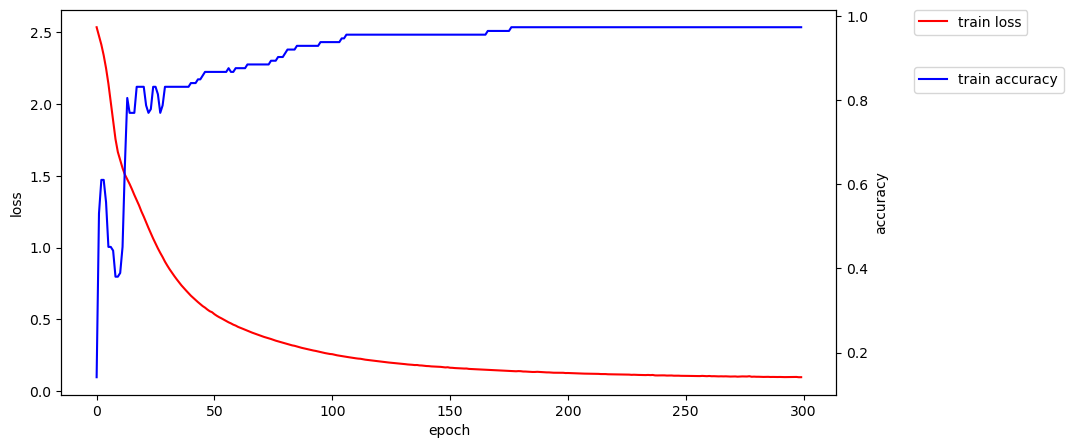

In [16]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

# 4. 다음 문맥 예측해 보기

In [17]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '곧': 7, '법이다': 8, '가는': 9, '고와야': 10, '오는': 11, '곱다': 12}


In [18]:
# 모델 사용하기 (문자 -> sequence로 수정 -> predict -> argmax -> 문자)
# 경마장에 -> 있는
word = input('입력단어 :')
encoded=t.texts_to_sequences([word])
print('입렷한 단어:{}, encoded:{}'.format(word, encoded))
input_data = pad_sequences(encoded, maxlen=5, padding='pre')
print(input_data)
output_data = model.predict(input_data, verbose=0).argmax()
for word, value in t.word_index.items():
    if output_data==value:
        print('예측한 단어 :', word)
        break

입력단어 :가는
입렷한 단어:가는, encoded:[[9]]
[[0 0 0 0 9]]
예측한 단어 : 말이


In [27]:
# 단어(가는),5 => 가는 말이 고와야 오는 말이 곱다
def sentence_generation(model, t, current_word, n):
    for i in range(n) : # n번 반복
        # current_word -> sequence -> padding -> predict.argmax -> 결과 단어(result)
        # current_word = current_word+' '+result
        encoded = t.texts_to_sequences([current_word])
        input_data = pad_sequences(encoded, maxlen=5, padding='pre')
        result = model.predict(input_data, verbose=0).argmax()
        for word, value in t.word_index.items():
            if result==value:
                result = word
                print('{}:{}'.format(i+1,result))
                current_word = current_word + ' ' + word
                print('{}:{}'.format(i+1,current_word))
                break
    return current_word

In [31]:
sentence_generation(model, t, '가는', 5)

1:말이
1:가는 말이
2:고와야
2:가는 말이 고와야
3:오는
3:가는 말이 고와야 오는
4:말이
4:가는 말이 고와야 오는 말이
5:곱다
5:가는 말이 고와야 오는 말이 곱다


'가는 말이 고와야 오는 말이 곱다'